<a href="https://colab.research.google.com/github/younhuiji/ColorMatch/blob/main/ColorMatch_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 치아 쉐이드 가이드 이미지들 저장


In [1]:
from google.colab import files

# 이미지 업로드
uploaded = files.upload()

# images 폴더 생성
!mkdir -p /content/images/index/

# 업로드된 이미지를 images 폴더로 이동
!mv * /content/images/index/

Saving a1.jpg to a1.jpg
Saving a2.jpg to a2.jpg
Saving a3.jpg to a3.jpg
Saving a4.jpg to a4.jpg
Saving b1.jpg to b1.jpg
Saving b2.jpg to b2.jpg
Saving b3.jpg to b3.jpg
Saving c1.jpg to c1.jpg
Saving c2.jpg to c2.jpg
Saving c3.jpg to c3.jpg
Saving c4.jpg to c4.jpg
mv: cannot move 'images' to a subdirectory of itself, '/content/images/index/images'


# 추가 test 치아 이미지 저장

In [2]:
from google.colab import files

# test 이미지 업로드
uploaded = files.upload()

# images 폴더 생성
!mkdir -p /content/images/

# 업로드된 이미지를 images 폴더로 이동
!mv * /content/images/

Saving 1.png to 1.png
Saving 2.png to 2.png
Saving 3.png to 3.png
Saving test.jpg to test.jpg
Saving test2.png to test2.png
Saving test3.png to test3.png
Saving test6.jpg to test6.jpg
mv: cannot move 'images' to a subdirectory of itself, '/content/images/images'


# 치아 이미지를 받아 RBG 값을 어떻게 추출할까?

## 방법 1. 좌표 픽셀 값으로 구하기

In [3]:
from PIL import Image

# 이미지 파일 열기
image = Image.open('/content/images/index/a1.jpg')

# RGB 값 추출
rgb_im = image.convert('RGB')

# (0, 0) 좌표에서 RGB 값 추출
x, y = 30, 30 
r, g, b = rgb_im.getpixel((x, y))  # (x, y) 좌표에서의 RGB 값 추출
print(r,g,b)

183 174 157


## 방법 2. 평균으로 구하기

In [4]:
def get_image_rgb(image_path):
    pixels = image_path.load()
    pixel_count = image.size[0] * image.size[1]
    r_total = 0
    g_total = 0
    b_total = 0
    for i in range(image.size[0]):  # width
        for j in range(image.size[1]):  # height
            r_total += pixels[i, j][0]
            g_total += pixels[i, j][1]
            b_total += pixels[i, j][2]
    return (r_total//pixel_count, g_total//pixel_count, b_total//pixel_count)


In [5]:
from PIL import Image

# 이미지 파일 열기
image = Image.open('/content/images/index/a1.jpg')

get_image_rgb(image)

(173, 166, 150)

## 방법 3. max 값으로 구하기

In [6]:
from PIL import Image
from collections import Counter

# 이미지 불러오기
img = Image.open('/content/images/index/a1.jpg')

# 이미지의 모든 픽셀의 RGB 값을 추출하여 리스트에 저장
pixels = img.load()
rgb_list = []

# 이미지가 4 채널(RGBA)을 가지고 있기 때문에 Alpha 값을 무시하고 RGB 값만 사용
for i in range(img.size[0]):
    for j in range(img.size[1]):
        pixel = image.getpixel((x, y))
        if len(pixel) == 3:  # 알파 채널이 없는 경우
            r, g, b = pixel
            rgb_list.append((r, g, b))
        else:
            r, g, b, a = pixel
            rgb_list.append((r, g, b))

# 결과 출력
# print(rgb_list)

# RGB 값 개수 카운트
counter = Counter(rgb_list)

most_common_color = counter.most_common(1)[0][0]
print(most_common_color)

(183, 174, 157)


## a1 치아 사진 비교

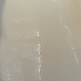

1. 좌표 픽셀. - (183 174 157)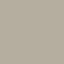
2. 평균.     - (173, 166, 150)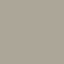
3. max      - (183, 174, 157)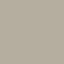

## 해당 파일 안에 있는 사진들 rgb배열과 라벨 배열로 저장.

In [70]:
import os
from PIL import Image

# 이미지 파일이 저장된 디렉토리 경로
image_dir = "/content/images/index/"

# RGB 값을 저장할 리스트 초기화
rgb_list = []

# 라벨을 저장할 리스트 초기화
label = []

# 디렉토리에 있는 모든 이미지 파일에 대해 반복
for filename in os.listdir(image_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        # 이미지 파일 열기
        image_path = os.path.join(image_dir, filename)
        image = Image.open(image_path)

        # 픽셀 데이터 추출하기
        pixels = list(image.getdata())

        # 모든 픽셀의 RGB 값 추출하기
        rgb_values = [tuple(pixel[:3]) for pixel in pixels]

        # 가장 많이 나타난 RGB 값 찾기
        most_common_rgb = Counter(rgb_values).most_common(1)[0][0]

        # 파일 이름에서 라벨 추출하기
        file_label = filename.split(".")[0][:2]

        # 결과 출력하기
        print("Most common RGB value in", filename, ":", most_common_rgb)
        print("Label for", filename, ":", file_label)

        # RGB 값과 라벨을 리스트에 추가하기
        rgb_list.append(most_common_rgb)
        label.append(file_label)

Most common RGB value in c3.jpg : (205, 174, 125)
Label for c3.jpg : c3
Most common RGB value in c2.jpg : (210, 191, 150)
Label for c2.jpg : c2
Most common RGB value in b3.jpg : (205, 183, 140)
Label for b3.jpg : b3
Most common RGB value in c4.jpg : (197, 167, 120)
Label for c4.jpg : c4
Most common RGB value in a1.jpg : (182, 173, 156)
Label for a1.jpg : a1
Most common RGB value in a4.jpg : (155, 133, 92)
Label for a4.jpg : a4
Most common RGB value in b1.jpg : (192, 185, 166)
Label for b1.jpg : b1
Most common RGB value in c1.jpg : (210, 196, 167)
Label for c1.jpg : c1
Most common RGB value in a3.jpg : (172, 154, 114)
Label for a3.jpg : a3
Most common RGB value in b2.jpg : (186, 174, 148)
Label for b2.jpg : b2
Most common RGB value in a2.jpg : (184, 173, 145)
Label for a2.jpg : a2


In [71]:
print(label)
print(rgb_list)

['c3', 'c2', 'b3', 'c4', 'a1', 'a4', 'b1', 'c1', 'a3', 'b2', 'a2']
[(205, 174, 125), (210, 191, 150), (205, 183, 140), (197, 167, 120), (182, 173, 156), (155, 133, 92), (192, 185, 166), (210, 196, 167), (172, 154, 114), (186, 174, 148), (184, 173, 145)]


## 위 리스트 2개를 저장하는 방법 == 딕셔너리로 저장하는 방법

In [72]:
data = {}

for i, label in enumerate(label):
    data[label] = rgb_list[i]

print(data)

{'c3': (205, 174, 125), 'c2': (210, 191, 150), 'b3': (205, 183, 140), 'c4': (197, 167, 120), 'a1': (182, 173, 156), 'a4': (155, 133, 92), 'b1': (192, 185, 166), 'c1': (210, 196, 167), 'a3': (172, 154, 114), 'b2': (186, 174, 148), 'a2': (184, 173, 145)}


## GB 색상 값을 이용하여 가장 가까운 색상을 찾는 다른 방법 중 하나는 Lab 색상 공간에서 거리를 계산하는 것

이를 위해서는 먼저 RGB 색상 값을 Lab 색상 값으로 변환해야 합니다. 이후에는 변환된 Lab 색상 값으로 두 색상 사이의 거리를 계산하여 가장 가까운 색상을 찾으면 됩니다.

다음은 RGB 색상 값을 Lab 색상 값으로 변환하는 함수입니다

In [73]:
def rgb_to_lab(color):
    if isinstance(color, str):
        color = color.strip().replace(',', '').replace('(', '').replace(')', '')
        color = tuple(map(int, color.split()))

    # Convert RGB to XYZ
    r = color[0] / 255
    g = color[1] / 255
    b = color[2] / 255
    if r > 0.04045:
        r = ((r + 0.055) / 1.055) ** 2.4
    else:
        r = r / 12.92
    if g > 0.04045:
        g = ((g + 0.055) / 1.055) ** 2.4
    else:
        g = g / 12.92
    if b > 0.04045:
        b = ((b + 0.055) / 1.055) ** 2.4
    else:
        b = b / 12.92
    x = r * 0.4124564 + g * 0.3575761 + b * 0.1804375
    y = r * 0.2126729 + g * 0.7151522 + b * 0.0721750
    z = r * 0.0193339 + g * 0.1191920 + b * 0.9503041

    # Convert XYZ to Lab
    x /= 0.950456
    y /= 1.000000
    z /= 1.088754
    if x > 0.008856:
        x = x ** (1/3)
    else:
        x = (7.787 * x) + (16 / 116)
    if y > 0.008856:
        y = y ** (1/3)
    else:
        y = (7.787 * y) + (16 / 116)
    if z > 0.008856:
        z = z ** (1/3)
    else:
        z = (7.787 * z) + (16 / 116)
    l = (116 * y) - 16
    a = 500 * (x - y)
    b = 200 * (y - z)
    
    return [l, a, b]


In [100]:
import math
def find_closest_color(target_color, color_list):
   
    closest_distance = math.inf
    
    target_lab = rgb_to_lab(target_color)
    
    for color in color_list:
        color_lab = rgb_to_lab(color)
        distance = math.sqrt((target_lab[0] - color_lab[0])**2 + (target_lab[1] - color_lab[1])**2 + (target_lab[2] - color_lab[2])**2)
        
        if distance < closest_distance:
            closest_color = color
            closest_distance = distance
            
    return closest_color



# test 사진
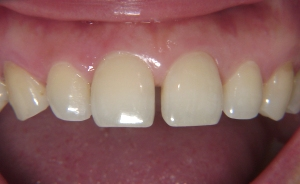

In [90]:
from PIL import Image
from collections import Counter

# 이미지 파일 열기
image = Image.open("/content/images/test.jpg")

# 픽셀 데이터 추출하기
pixels = list(image.getdata())

# 모든 픽셀의 RGB 값 추출하기
rgb_values = [tuple(pixel[:3]) for pixel in pixels]

# 가장 많이 나타난 RGB 값 찾기
most_common_rgb = Counter(rgb_values).most_common(1)[0][0]

# 결과 출력하기
print("Most common RGB value:", most_common_rgb)


# 가장 가까운 치아 색 가이드 번호 알려줌
rgb_to_lab(most_common_rgb)
result = find_closest_color(most_common_rgb, rgb_list)

Most common RGB value: (216, 196, 170)


In [93]:
def find_color_key(data, color):
    for key, value in data.items():
        if value == color:
            return key
    return None

color_key = find_color_key(data, result)
print("치아색 :",color_key)

치아색 : c1


# 결과값 : c1 
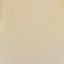

#test2 사진
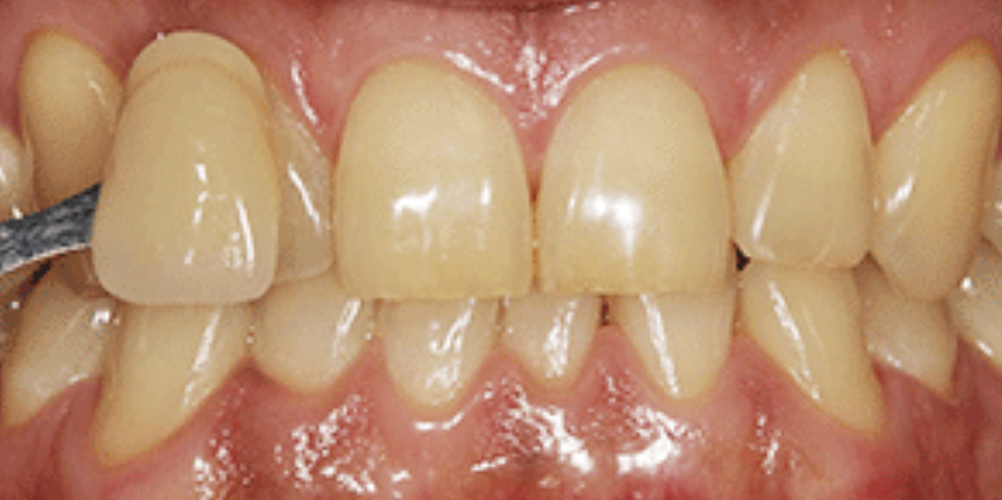

In [98]:
from PIL import Image
from collections import Counter

# 이미지 파일 열기
image = Image.open("/content/images/test6.jpg")

# 픽셀 데이터 추출하기
pixels = list(image.getdata())

# 모든 픽셀의 RGB 값 추출하기
rgb_values = [tuple(pixel[:3]) for pixel in pixels]

# 가장 많이 나타난 RGB 값 찾기
most_common_rgb = Counter(rgb_values).most_common(1)[0][0]

# 결과 출력하기
print("Most common RGB value:", most_common_rgb)


# 가장 가까운 치아 색 가이드 번호 알려줌
rgb_to_lab(most_common_rgb)
result = find_closest_color(most_common_rgb, rgb_list)

Most common RGB value: (215, 196, 156)


In [99]:
def find_color_key(data, color):
    for key, value in data.items():
        if value == color:
            return key
    return None

color_key = find_color_key(data, result)
print("치아색 :",color_key)

치아색 : c2


# 결과 값 : c2
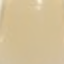 

## 결과적으로는 test 이미지는 결과값이 달랐다. 하지만, test2 이미지는 같았다.

>find_nearest_color 함수랑 find_closest_color 함수의 차이는?

"find_nearest_color" 함수와 "find_closest_color" 함수는 이름에서 암시하듯이 매우 유사하지만 미묘한 차이가 있습니다.

"find_nearest_color" 함수는 주어진 색상과 가장 가까운 색상을 찾는 함수입니다. 이 함수는 RGB 색상 공간에서 두 색상 간의 유클리드 거리를 계산하고, 거리가 가장 가까운 색상을 반환합니다.

반면에 "find_closest_color" 함수는 "find_nearest_color" 함수와 유사하지만 다른 거리 측정 방법을 사용합니다. 이 함수는 보통 색상 간의 인간적인 감각적인 거리를 측정하기 위해 색상 공간의 다른 차원을 사용합니다. 예를 들어, CIELAB 색상 공간에서 색상 간의 거리를 계산할 수 있습니다.

따라서 두 함수는 거리 측정 방법에서 차이가 있습니다. "find_nearest_color" 함수는 RGB 공간에서 유클리드 거리를 사용하고, "find_closest_color" 함수는 다른 색상 공간과 해당 공간에서의 거리 측정 방법을 사용합니다.

### 무엇이 더 정확도가 높을까?

"find_nearest_color" 함수와 "find_closest_color" 함수 중 어느 것이 더 정확한지는 문제에 따라 다릅니다.

RGB 공간에서 색상 간 거리를 사용하는 "find_nearest_color" 함수는 컴퓨터에서 가장 일반적으로 사용되는 색상 모델 중 하나입니다. 그러나 이 공간에서 거리 측정 방법은 색상 간의 인간적인 감각적인 거리와 일치하지 않을 수 있습니다. 예를 들어, 노란색과 파란색은 RGB 공간에서 멀리 떨어져 있지만, 인간의 눈에서는 서로 매우 다른 색상이 아닙니다.

반면에 "find_closest_color" 함수는 인간의 색상 인지에 더 맞는 색상 공간에서 거리를 측정하므로 더 정확한 결과를 제공할 수 있습니다. 그러나 이 방법은 "find_nearest_color" 함수보다 계산 비용이 더 많이 들기 때문에 더 많은 시간이 소요될 수 있습니다.

따라서 문제에 따라 더 적합한 함수를 선택해야합니다. 색상 간의 거리 측정이 민감한 경우에는 "find_closest_color" 함수를 사용하는 것이 좋습니다. 하지만 계산 비용이 더 중요한 경우에는 "find_nearest_color" 함수를 사용하는 것이 더 나을 수 있습니다.